In [1]:
in_path = "../data/evaluation/"

In [2]:
from os.path import dirname
import os, sys, inspect

currentdir = os.getcwd()
parentdir = dirname(currentdir)

sys.path.insert(0,parentdir)

# Libs

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd 
import numpy as np
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns 

from src.evaluate import plot_metrics_cutoff, plot_confusion_matrix, plot_auc_roc, get_metric_score

# Logistic Regression

In [5]:
log_eval_data, log_eval_train, log_eval_test = pickle.load(open(in_path+'log_eval.pkl', 'rb'))

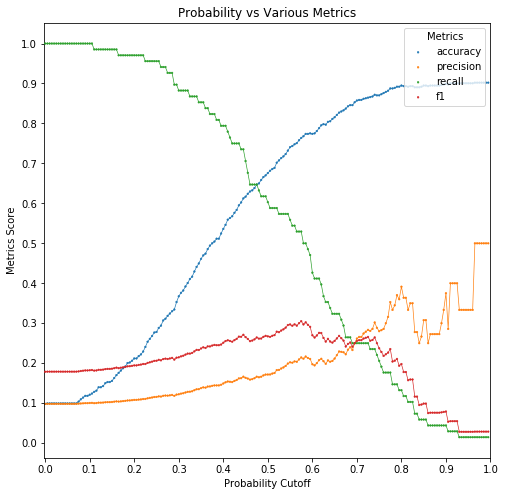

In [6]:
log_cutoff_metrics = plot_metrics_cutoff(log_eval_test)

TRAIN Accuracy:  0.642501776830135; Recall:  0.7142857142857143
TEST Accuracy:  0.6498559077809798; Recall:  0.6323529411764706


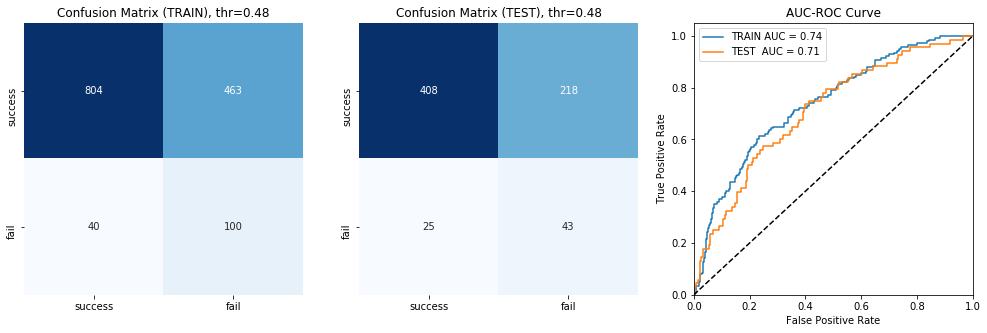

In [7]:
prob_thr = 0.48

print('TRAIN Accuracy: ', get_metric_score(log_eval_train.actual, log_eval_train.proba, prob_thr, 'accuracy'), end='; ')
print('Recall: ', get_metric_score(log_eval_train.actual, log_eval_train.proba, prob_thr, 'recall'))
print('TEST Accuracy: ', get_metric_score(log_eval_test.actual, log_eval_test.proba, prob_thr, 'accuracy'), end='; ')
print('Recall: ', get_metric_score(log_eval_test.actual, log_eval_test.proba, prob_thr, 'recall'))

fig, ax = plt.subplots(1,3, figsize=(17,5))
plot_confusion_matrix(ax[0], log_eval_data, 'TRAIN', thr=prob_thr)
plot_confusion_matrix(ax[1], log_eval_data, 'TEST', thr=prob_thr)
plot_auc_roc(ax[2], 
         log_eval_train.actual,
         log_eval_train.proba,
         log_eval_test.actual, 
         log_eval_test.proba)

# Random Forest

In [8]:
RF_eval_data, RF_eval_train, RF_eval_test = pickle.load(open(in_path+'RF_eval.pkl', 'rb'))

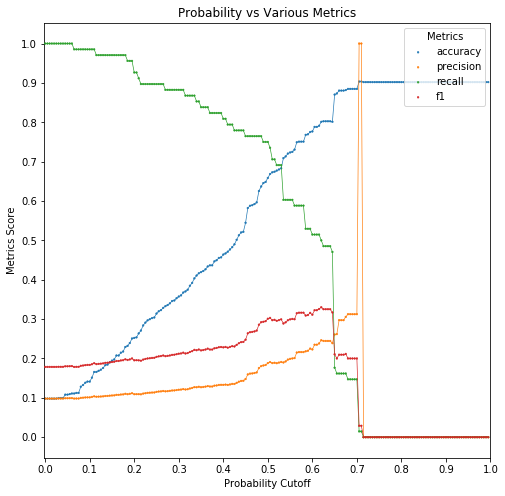

In [9]:
RF_cutoff_metrics = plot_metrics_cutoff(RF_eval_test)

TRAIN Accuracy:  0.6823027718550106; Recall:  0.75
TEST Accuracy:  0.6829971181556196; Recall:  0.6911764705882353


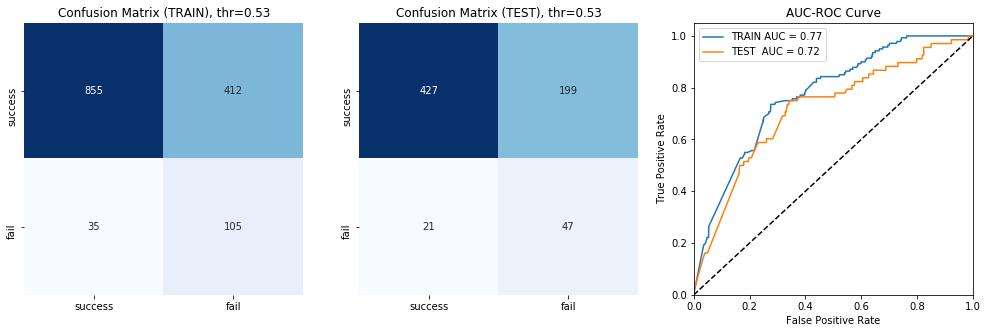

In [10]:
prob_thr = 0.53

print('TRAIN Accuracy: ', get_metric_score(RF_eval_train.actual, RF_eval_train.proba, prob_thr, 'accuracy'), end='; ')
print('Recall: ', get_metric_score(RF_eval_train.actual, RF_eval_train.proba, prob_thr, 'recall'))
print('TEST Accuracy: ', get_metric_score(RF_eval_test.actual, RF_eval_test.proba, prob_thr, 'accuracy'), end='; ')
print('Recall: ', get_metric_score(RF_eval_test.actual, RF_eval_test.proba, prob_thr, 'recall'))

fig, ax = plt.subplots(1,3, figsize=(17,5))
plot_confusion_matrix(ax[0], RF_eval_data, 'TRAIN', thr=prob_thr)
plot_confusion_matrix(ax[1], RF_eval_data, 'TEST', thr=prob_thr)
plot_auc_roc(ax[2], 
         RF_eval_train.actual,
         RF_eval_train.proba,
         RF_eval_test.actual, 
         RF_eval_test.proba)

# Support Vector Machines

In [11]:
SVC_eval_data, SVC_eval_train, SVC_eval_test = pickle.load(open(in_path+'SVC_eval.pkl', 'rb'))

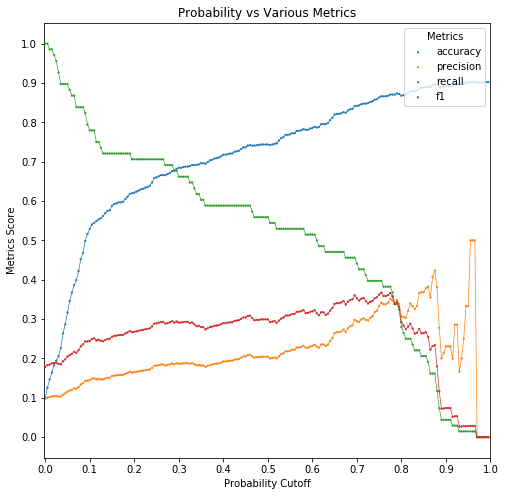

In [12]:
SVC_cutoff_metrics = plot_metrics_cutoff(SVC_eval_test)

TRAIN Accuracy:  0.7043354655294953; Recall:  0.9
TEST Accuracy:  0.6844380403458213; Recall:  0.6617647058823529


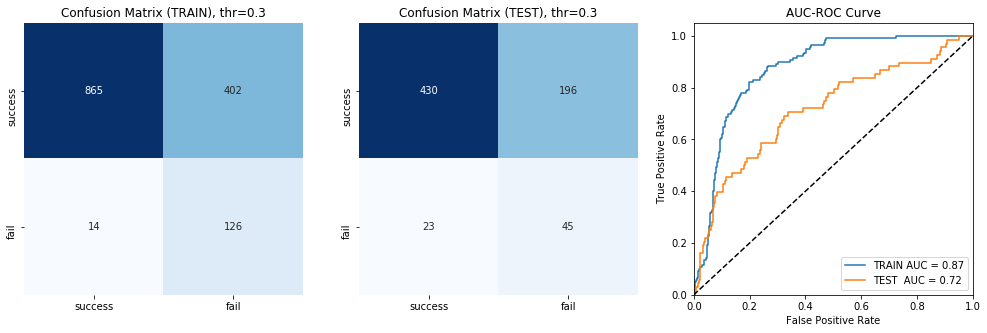

In [13]:
prob_thr = 0.3

print('TRAIN Accuracy: ', get_metric_score(SVC_eval_train.actual, SVC_eval_train.proba, prob_thr, 'accuracy'), end='; ')
print('Recall: ', get_metric_score(SVC_eval_train.actual, SVC_eval_train.proba, prob_thr, 'recall'))
print('TEST Accuracy: ', get_metric_score(SVC_eval_test.actual, SVC_eval_test.proba, prob_thr, 'accuracy'), end='; ')
print('Recall: ', get_metric_score(SVC_eval_test.actual, SVC_eval_test.proba, prob_thr, 'recall'))

fig, ax = plt.subplots(1,3, figsize=(17,5))
plot_confusion_matrix(ax[0], SVC_eval_data, 'TRAIN', thr=prob_thr)
plot_confusion_matrix(ax[1], SVC_eval_data, 'TEST', thr=prob_thr)
plot_auc_roc(ax[2], 
         SVC_eval_train.actual,
         SVC_eval_train.proba,
         SVC_eval_test.actual, 
         SVC_eval_test.proba)